## LendingClub SVM

### Reading and Understanding the data

In [1]:
loans <- read.csv('loan_data.csv')
str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : chr  "debt_consolidation" "credit_card" "debt_consolidation" "debt_consolidation" ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


In [2]:
loans$purpose <- as.factor(loans$purpose)
loans$credit.policy <- as.factor(loans$credit.policy)
loans$inq.last.6mths <- as.factor(loans$inq.last.6mths)
loans$delinq.2yrs <- as.factor(loans$delinq.2yrs)
loans$pub.rec <- as.factor(loans$pub.rec)
loans$not.fully.paid <- as.factor(loans$not.fully.paid)

In [3]:
str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : Factor w/ 28 levels "0","1","2","3",..: 1 1 2 2 1 1 1 1 2 2 ...
 $ delinq.2yrs      : Factor w/ 11 levels "0","1","2","3",..: 1 1 1 1 2 1 1 1 1 1 ...
 $ pub.rec          : Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ not.fully.paid   

### EDA

In [4]:
library(ggplot2)

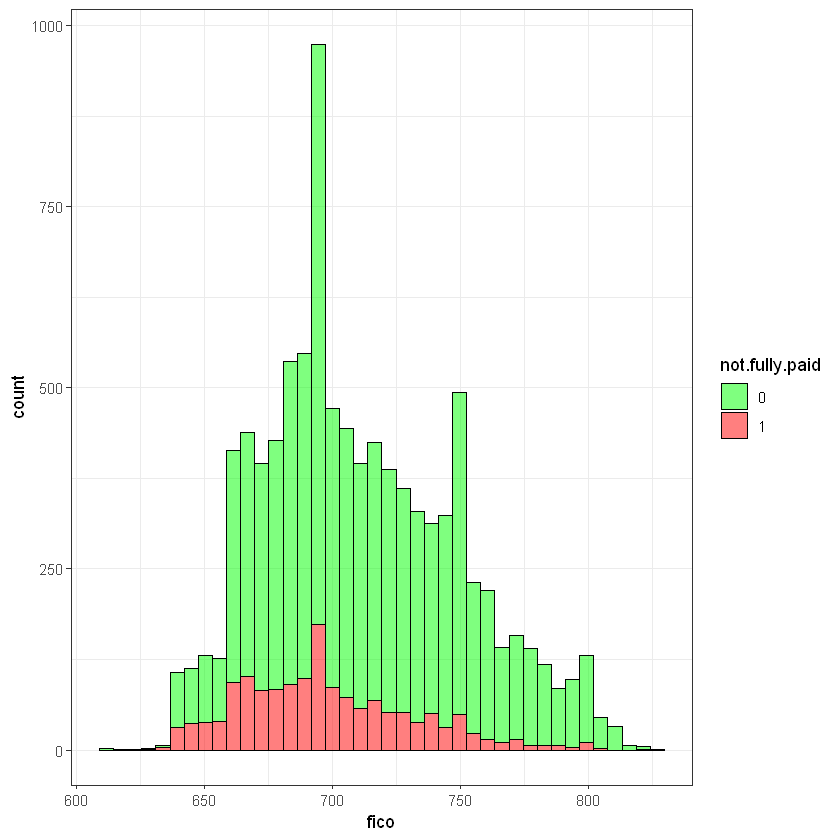

In [5]:
pl1 <- ggplot(loans, aes(fico)) + geom_histogram(aes(fill=not.fully.paid), color='black', bins=40, alpha=0.5) + theme_bw()
pl2 <- pl1 + scale_fill_manual(values=c('green','red'))
pl2

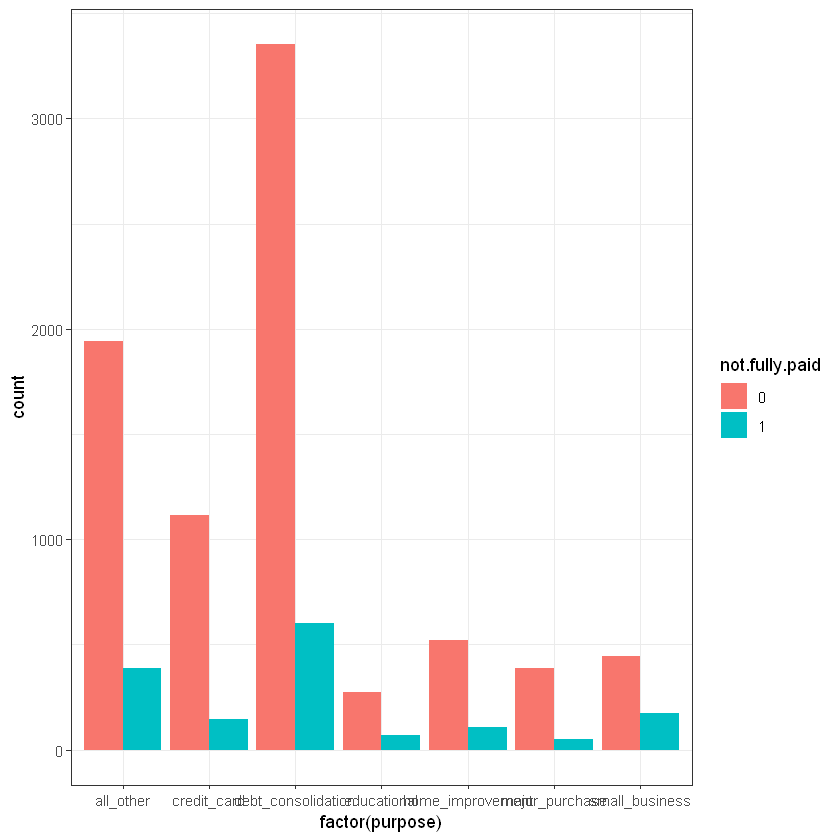

In [6]:
pl1 <- ggplot(loans, aes(x=factor(purpose))) + geom_bar(aes(fill=not.fully.paid), position = 'dodge') + theme_bw()
pl1

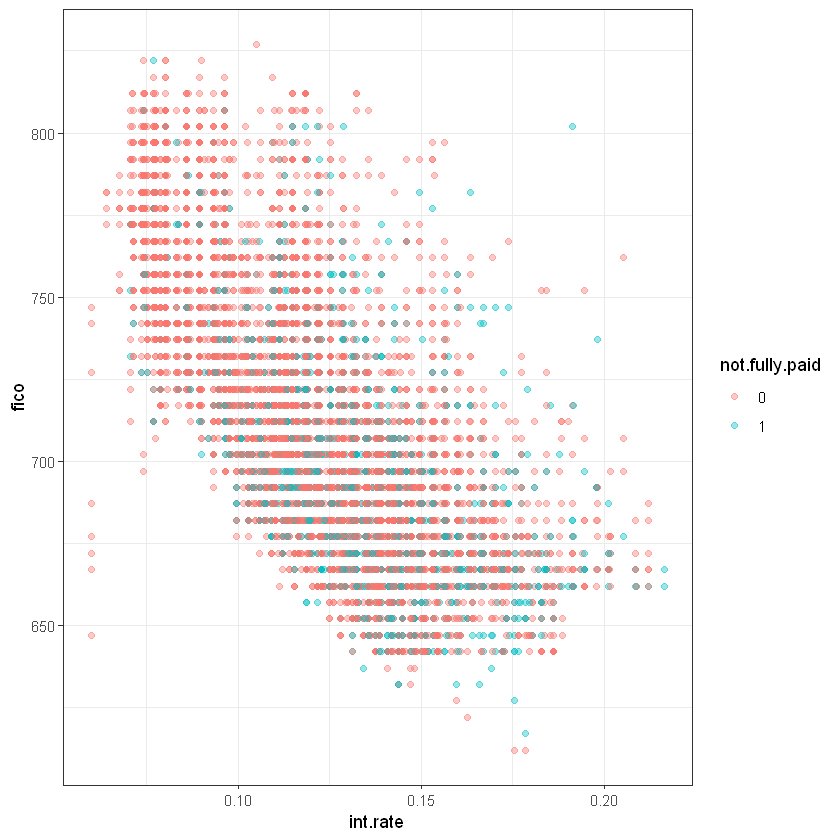

In [7]:
pl1 <- ggplot(loans, aes(x=int.rate, y=fico)) + geom_point(aes(color=not.fully.paid), alpha=0.4) + theme_bw()
pl1

### Splitting the data

In [8]:
library(caTools)
set.seed(101)

sample <- sample.split(loans$not.fully.paid, SplitRatio=0.7)
train <- subset(loans, sample == T)
test <- subset(loans, sample == F)

### Building the model

In [9]:
library(e1071)

model <- svm(not.fully.paid~., data=train)
summary(model)


Call:
svm(formula = not.fully.paid ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  2849

 ( 1776 1073 )


Number of Classes:  2 

Levels: 
 0 1




In [10]:
pred.values <- predict(model, test[1:13])
table(pred.values, test$not.fully.paid)

           
pred.values    0    1
          0 2413  460
          1    0    0

### Tuning the model

In [11]:
tuned.results <- tune(svm, train.x = not.fully.paid~., data=train, kernel='radial', ranges = list(cost=c(100,200),gamma=c(0.1)))
summary(tuned.results)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100   0.1

- best performance: 0.2059628 

- Detailed performance results:
  cost gamma     error dispersion
1  100   0.1 0.2059628 0.01465493
2  200   0.1 0.2208793 0.01276272


In [12]:
tuned.model <- svm(not.fully.paid~., data=train, cost=100, gamma=0.1)

In [13]:
tuned.predictions <- predict(tuned.model, test[1:13])
table(tuned.predictions,test$not.fully.paid)

                 
tuned.predictions    0    1
                0 2179  358
                1  234  102

## END!!!